<a href="https://colab.research.google.com/github/Fhanafii/Klasifikasi-NaiveBayes-menggunakan-dataset-Jeruk/blob/main/Naive_bayes_dataset_jeruk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#import dataset dari Google Drive memakai path
path = "/content/drive/MyDrive/Dataset/Jeruk.csv"
jeruk_ds = pd.read_csv(path)

In [38]:
# Menampilkan dataset Jeruk
jeruk_ds

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


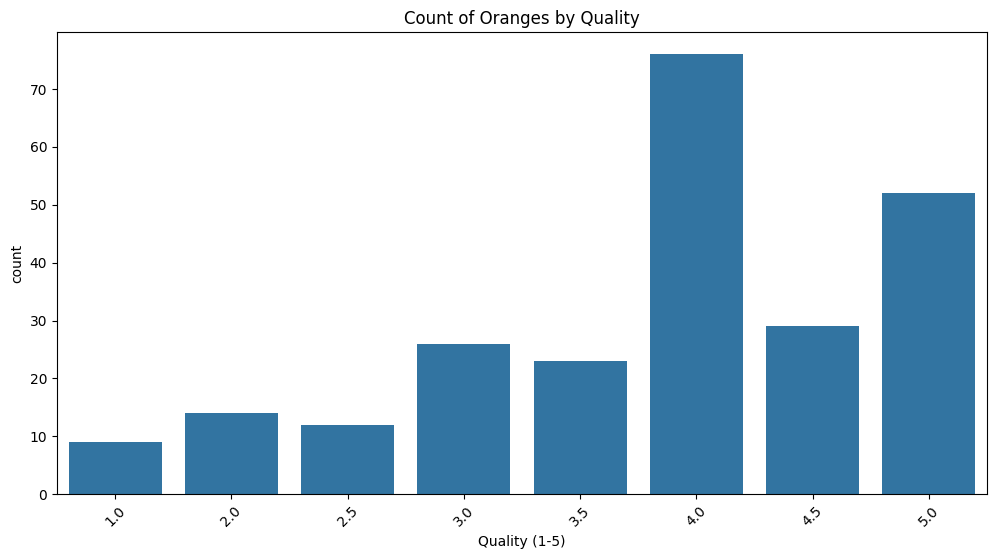

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Quality (1-5)", data=jeruk_ds)
plt.title("Count of Oranges by Quality")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Encode variabel kategori
le = LabelEncoder()
jeruk_ds['Color'] = le.fit_transform(jeruk_ds['Color'])
jeruk_ds['Variety'] = le.fit_transform(jeruk_ds['Variety'])
jeruk_ds['Blemishes (Y/N)'] = le.fit_transform(jeruk_ds['Blemishes (Y/N)'])

In [27]:
# Mengubah 'Quality (1-5)' menjadi kelas diskrit
bins = [0, 1, 2, 3, 4, 5]
labels = [1, 2, 3, 4, 5]
jeruk_ds['Quality (1-5)'] = pd.cut(jeruk_ds['Quality (1-5)'], bins=bins, labels=labels, include_lowest=True)

In [28]:
# Define feature columns dan target column
feature_columns = jeruk_ds.columns[:-1]
target_column = jeruk_ds.columns[-1]
X = jeruk_ds[feature_columns]
y = jeruk_ds[target_column]
y

0      4
1      5
2      5
3      4
4      5
      ..
236    5
237    4
238    5
239    3
240    4
Name: Quality (1-5), Length: 241, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [29]:
# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test

24     5
6      4
222    3
208    4
236    5
173    4
197    4
220    3
9      5
113    4
45     5
207    5
225    4
209    5
82     4
144    4
186    4
15     5
66     4
127    5
33     4
19     5
108    2
30     5
183    4
170    4
10     3
73     5
93     5
154    4
111    2
215    4
25     4
60     5
18     2
126    3
96     5
194    4
137    4
238    5
75     5
117    3
112    5
16     4
193    5
67     4
227    3
38     5
178    4
Name: Quality (1-5), dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [30]:
# Inisialisasi dan latih Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [31]:
# membuat prediksi
y_pred = nb_model.predict(X_test)

In [32]:
#membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  0  0  0  0]
 [ 1  1  1  0  0]
 [ 0  1  3  1  1]
 [ 0  0  4 12  5]
 [ 0  0  0  4 15]]


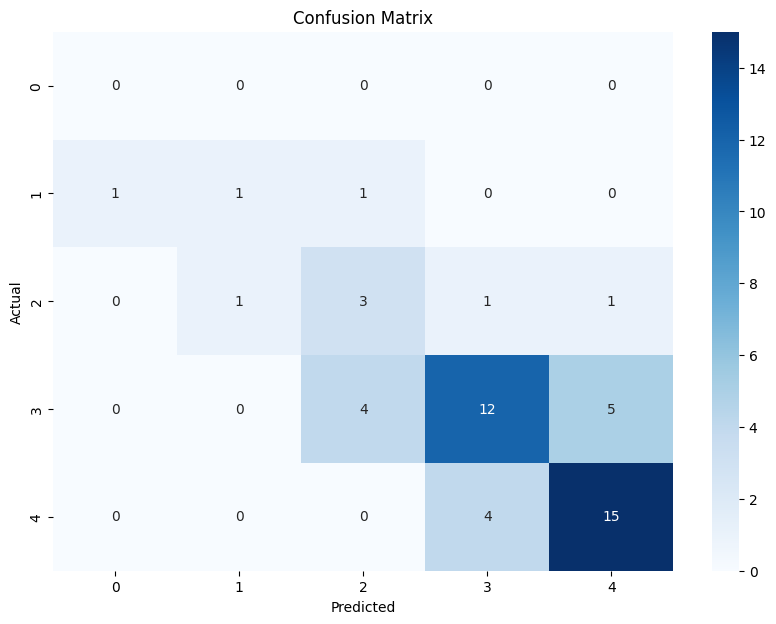

In [43]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6326530612244898


In [46]:
# Displaying the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.50      0.33      0.40         3
           3       0.38      0.50      0.43         6
           4       0.71      0.57      0.63        21
           5       0.71      0.79      0.75        19

    accuracy                           0.63        49
   macro avg       0.46      0.44      0.44        49
weighted avg       0.66      0.63      0.64        49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


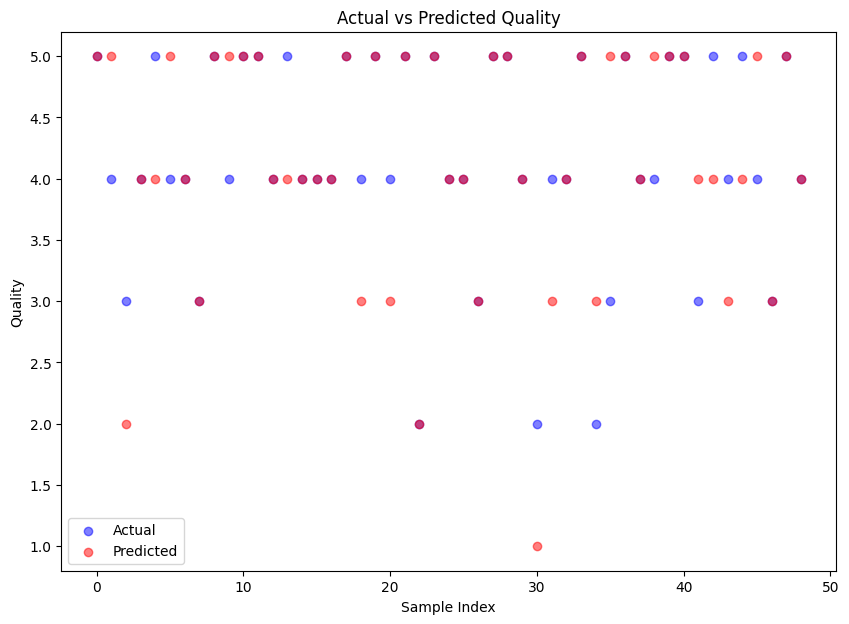

In [44]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 7))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Quality')
plt.title('Actual vs Predicted Quality')
plt.show()